## Import Libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv("labeled_data.csv")

In [3]:
dataset

,serial_no,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


## Analyzing Data

In [4]:
dataset.isnull().sum()
##is null tells us about is any dataset is empty or not and sum sumarizes it

serial_no             0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   serial_no           24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [6]:
'''
describe method gives us the "statistical" info, for eg it can help us to determine how much hate do we receive on day
to day basis.
'''
dataset.describe()

,serial_no,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [7]:
dataset["labels"] = dataset["class"].map({0: "hate_speech",
                                          1: "offensive_langauge",
                                          2: "neither"})

In [8]:
dataset

,serial_no,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,neither
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive_langauge
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive_langauge
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive_langauge
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive_langauge
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive_langauge
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",neither
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,offensive_langauge
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,offensive_langauge


## Data Preprocessing and Cleaning

#### Our task is to reduce the dataset and to do that we'll import regular expression ,i.e, re to remove unwanted &%#@ signs {A regex (regular expression) consists of a sequence of sub-expressions. In this example, [0-9] and + . The [...] , known as character class (or bracket list), encloses a list of characters. It matches any SINGLE character in the list.} and also import nltk ,i.e, natural language toolkit which helps in removing stop words and steeming. importing string for removal of punctuations.

In [9]:
import re
import nltk
import string

In [11]:
#IMPORTING STOPWORDS (insignificant words)
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
#IMPORTING STEMMING (limitization)
stemmer = nltk.PorterStemmer()

1. Porter Stemmer
Description: One of the most widely used stemmers. It applies a series of predefined rules to iteratively reduce words to their stems.
Example: "running" → "run".
Characteristics: Fast and effective but may sometimes over-stem or under-stem words.
2. Lancaster Stemmer
Description: A more aggressive stemmer than Porter, applying a strict set of rules.
Example: "running" → "run".
Characteristics: Tends to over-stem words, potentially leading to loss of meaning.
3. Snowball Stemmer
Description: An improved version of the Porter Stemmer, also known as the Porter2 stemmer. It is more flexible and supports multiple languages.
Example: "happily" → "happi".
Characteristics: More consistent and adaptable than Porter.

In [12]:
#Data cleaning
def clean_data(text):
    # Convert to lowercase
    text = str(text).lower()
    # removing urls
    text = re.sub('https?://\S+|www\S+' , '', text)
    # Remove specific characters
    text = re.sub('[#@><>.;]' , '' , text)
    # Remove newline characters
    text = re.sub('\n' , '', text)
    # Remove words containing digits
    text = re.sub('\w*\d\w* ' , '', text)
    # Remove punctuation
    text = re.sub('[%s]' %re.escape(string.punctuation), '', text)
    ## removing stopwords
    text = [word for word in text.split(' ') if word not in stopwords]
    text = " ".join(text)
    ## stemming
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

## -> `sub()` function

`re.sub()` is a function in Python's `re` module (regular expressions) that allows you to replace parts of a string that match a specific pattern with a desired replacement. It is commonly used for pattern-based text substitution.

**Syntax**: `re.sub(pattern, replacement, string, count=0, flags=0)`

### Parameters:
1. **pattern**: The regular expression pattern to search for in the string.
2. **replacement**: The string (or function) to replace the matched pattern.
3. **string**: The input string where the search and replace is performed.
4. **count** (optional): Maximum number of replacements to make. Defaults to 0 (replace all matches).
5. **flags** (optional): Special flags like `re.IGNORECASE` for case-insensitive matching.

### -> Removal of URL

1. `https?`: Matches the string "http" or "https", where the "?" indicates that the preceding "s" is optional.
2. `://`: Matches the colon and double slashes after "http" or "https" in a typical URL.
3. `\S+`: Matches one or more non-whitespace characters after the "://". This is meant to match the domain part of the URL.
4. `|`: Represents the logical OR, so it allows either the pattern before or after the pipe to match.
5. `www\S+`: Matches the string "www" followed by one or more non-whitespace characters. This is another pattern for URLs starting with "www".

### -> Remove Punctuation

1. **`string.punctuation`**: This is a predefined string in Python's `string` module that contains all punctuation characters, such as `!"#$%&'()*+,-./:;<=>?@[\]^_{|}~`.
2. **`re.escape()`**: This function escapes all special characters in the given string. For example, some characters (like `[` or `]`) have special meanings in regular expressions, so `re.escape()` makes sure that they are treated as literal characters rather than special regex operators.  
   Example: `re.escape('!#$%')` will return `'!\\#\\$%'`.
3. **`'[%s]' % re.escape(string.punctuation)`**: This part builds the regular expression pattern dynamically.  
   The `%s` is replaced by the escaped version of `string.punctuation`.  
   This means the pattern will match any character that is a punctuation mark. For example, it will create a pattern like `"[!\\\"#$%&'()*+,-./:;<=>?@\\[\\]^_{|}~]"`.
4. `[%s]` is a string with %s as a placeholder. This is like saying, "I want to create a string where I will insert something here (the %s part)."
5. `%`: The % takes the result of re.escape(string.punctuation) and puts it in place of the %s
   
### ->Remove Word Containing Digits

The regular expression `'\w*\d\w*'` is used in the re.sub function to remove words that contain digits from the given text.
Let's break down the components of this regular expression:
1. \w* : Matches zero or more word characters (letters, digits, or underscores).
2. \d : Matches a digit (0-9).
3. \w* : Again, matches zero or more word characters.


In [13]:
data = dataset[["tweet", "labels"]]

In [14]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,neither
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive_langauge
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive_langauge
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive_langauge
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive_langauge
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive_langauge
24779,"you've gone and broke the wrong heart baby, an...",neither
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive_langauge
24781,youu got wild bitches tellin you lies,offensive_langauge


In [15]:
data["tweet"] = data["tweet"].apply(clean_data)

C:\Users\riyag\AppData\Local\Temp\ipykernel_15084\1832165696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"].apply(clean_data)


In [16]:
data

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,neither
1,rt mleew17 boy dat coldtyga dwn bad cuffin da...,offensive_langauge
2,rt urkindofbrand dawg rt 80sbaby4lif ever fuc...,offensive_langauge
3,rt cganderson vivabas look like tranni,offensive_langauge
4,rt shenikarobert shit hear might true might f...,offensive_langauge
...,...,...
24778,you muthafin lie 8220lifeask coreyemanuel righ...,offensive_langauge
24779,youv gone broke wrong heart babi drove redneck...,neither
24780,young buck wanna eat dat nigguh like aint fuck...,offensive_langauge
24781,youu got wild bitch tellin lie,offensive_langauge


## Model Building

In [17]:
X = np.array(data["tweet"])
Y = np.array(data["labels"])

In [18]:
'''The CountVectorizer is a text feature extraction technique in machine learning, used to convert a collection
of text documents into a matrix of token counts.'''
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [19]:
cv = CountVectorizer()
X = cv.fit_transform(X)
## HELPS IN TRANSFORMING ARRAY IN THE VECTOR FORM

In [20]:
X

<24783x32100 sparse matrix of type '<class 'numpy.int64'>'
	with 206268 stored elements in Compressed Sparse Row format>

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [132]:
X_train

<16604x32100 sparse matrix of type '<class 'numpy.int64'>'
	with 138298 stored elements in Compressed Sparse Row format>

In [134]:
from sklearn.tree import DecisionTreeClassifier

A **Decision Tree Classifier** is a supervised machine learning algorithm used for classification tasks. It works by splitting the data into subsets based on feature values, creating a tree-like structure where each node represents a decision based on a feature, and each leaf represents a class label.

### Role:
1. **Classification**: It is used to classify data into different categories (classes) based on feature values.
2. **Splitting Data**: The tree splits data at each node based on the feature that provides the best separation (often using metrics like **Gini impurity** or **Information Gain**).
3. **Interpretability**: The resulting model is easy to interpret, as it visually represents how decisions are made based on input features.
4. **Handling Both Numeric and Categorical Data**: It can handle both types of data, making it versatile for various applications.

### Example:
If you have a dataset with features like age, income, and education level, the decision tree might split the data by "income > 50k" at the root, then further split based on "age < 30", and so on, until it classifies the data into categories like "Buy" or "Not Buy".

In short, a **Decision Tree Classifier** is used for making predictions by following decision rules derived from the input features.

In [135]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [136]:
Y_pred = dt.predict(X_test)

In [137]:
##CONFUSION MATRIX AND ACCURACY
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [138]:
cm

array([[ 152,   37,  276],
       [  33, 1122,  224],
       [ 221,  190, 5924]], dtype=int64)

In [139]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

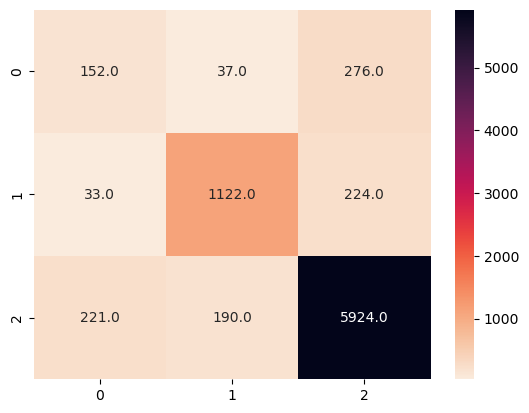

In [140]:
sns.heatmap(cm, annot=True, fmt=".1f", cmap="rocket_r")
##darker the diagonal elements, accurate the detection is, fmt is for float/decimal value notation

In [141]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred, Y_test)

0.8800586868810368